In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the cleaned dataset
file_path = "/content/sample_data/cleaned_shein_products.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_columns = ["color", "size", "category", "brand", "in_stock"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["final_price"])
y = df["final_price"]

# Train and evaluate models for different splits
def train_evaluate_models(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
    }

    print(f"Test Size: {test_size * 100}%")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        print(f"{name}: MAE: {mae:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}")
    print("\n")

# Run for 70:30, 75:25, and 80:20 splits
for test_size in [0.3, 0.25, 0.2]:
    train_evaluate_models(test_size)


Test Size: 30.0%
Linear Regression: MAE: 6.72, RMSE: 13.68, R² Score: 0.97
Random Forest Regressor: MAE: 6.38, RMSE: 40.51, R² Score: 0.76


Test Size: 25.0%
Linear Regression: MAE: 6.65, RMSE: 14.14, R² Score: 0.98
Random Forest Regressor: MAE: 6.79, RMSE: 41.14, R² Score: 0.79


Test Size: 20.0%
Linear Regression: MAE: 6.34, RMSE: 13.73, R² Score: 0.98
Random Forest Regressor: MAE: 7.78, RMSE: 45.54, R² Score: 0.79




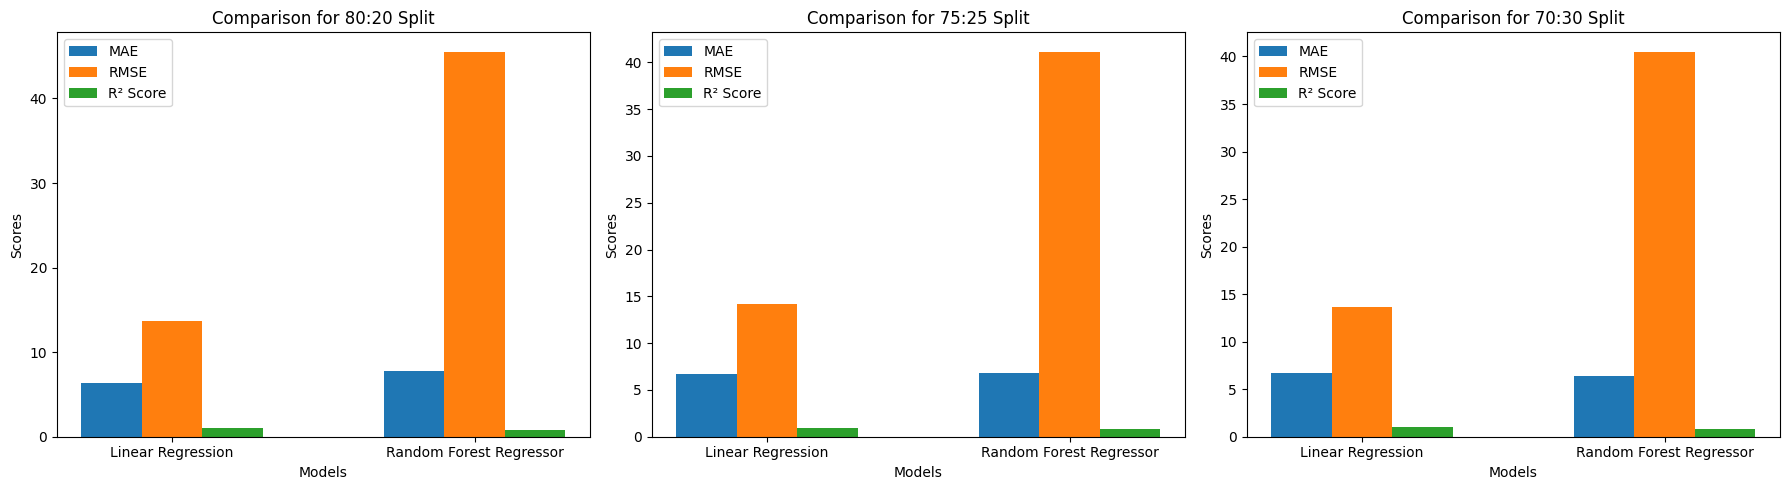

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the cleaned dataset
file_path = "/content/sample_data/cleaned_shein_products.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_columns = ["color", "size", "category", "brand", "in_stock"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["final_price"])
y = df["final_price"]

# Train and evaluate models for different splits
def train_evaluate_models(test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        results[name] = (mae, rmse, r2)

    return results

# Run for 80:20, 75:25, and 70:30 splits
test_splits = [0.2, 0.25, 0.3]
split_labels = ["80:20", "75:25", "70:30"]
all_results = {split_labels[i]: train_evaluate_models(ts) for i, ts in enumerate(test_splits)}

# Plot comparison bar graphs
metrics = ["MAE", "RMSE", "R² Score"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (split, results) in zip(axes, all_results.items()):
    values = {metric: [] for metric in metrics}
    x_labels = list(results.keys())
    x = np.arange(len(x_labels))
    width = 0.2

    for model_name, (mae, rmse, r2) in results.items():
        values["MAE"].append(mae)
        values["RMSE"].append(rmse)
        values["R² Score"].append(r2)

    for i, (metric_name, metric_values) in enumerate(values.items()):
        ax.bar(x + i * width - width, metric_values, width, label=metric_name)

    ax.set_title(f"Comparison for {split} Split")
    ax.set_xlabel("Models")
    ax.set_ylabel("Scores")
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Load the cleaned dataset
file_path = "/content/sample_data/cleaned_shein_products.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_columns = ["color", "size", "category", "brand", "in_stock"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["final_price"])
y = df["final_price"]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

def predict_final_price(input_data):
    """
    Predicts final_price based on input values.
    input_data: Dictionary with keys as column names and values as input values.
    """
    input_df = pd.DataFrame([input_data])

    # Encode input categorical variables
    for col in categorical_columns:
        if col in input_df:
            if input_df[col][0] not in label_encoders[col].classes_:
                label_encoders[col].classes_ = np.append(label_encoders[col].classes_, input_df[col][0])
            input_df[col] = label_encoders[col].transform([input_df[col][0]])

    prediction = model.predict(input_df)[0]
    return round(prediction, 2)

# Get user input
user_input = {}
user_input["color"] = input("Enter color: ")
user_input["size"] = input("Enter size: ")
user_input["category"] = input("Enter category: ")
user_input["brand"] = input("Enter brand: ")
user_input["initial_price"] = float(input("Enter initial price: "))
user_input["reviews_count"] = int(input("Enter reviews count: "))
user_input["rating"] = float(input("Enter rating: "))
user_input["in_stock"] = input("Enter in_stock (True/False): ")

predicted_price = predict_final_price(user_input)
print(f"Predicted Final Price: {predicted_price}")


Enter color: Black
Enter size: 220V-240V
Enter category: Hot Plates
Enter brand: SHEIN
Enter initial price: 299.2
Enter reviews count: 0
Enter rating: 0
Enter in_stock (True/False): True
Predicted Final Price: 235.1
